# Exercise: Refactoring The Bad Boids

## Bad_Boids


We have written some _very bad_ code implementing our Boids flocking example.

Here's the [Github link](https://github.com/UCL/bad-boids).

Please fork it on GitHub, and clone your fork.


``` bash
git clone      git@github.com:yourname/bad-boids.git 
# OR git clone https://github.com/yourname/bad-boids.git
```

For the Exercise, you should start from the GitHub repository, but here's our terrible code:

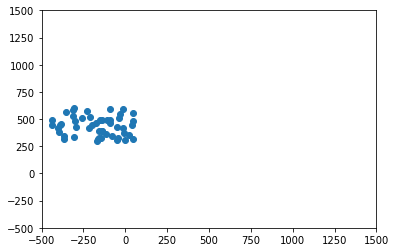

In [1]:
"""
A deliberately bad implementation of 
[Boids](http://dl.acm.org/citation.cfm?doid=37401.37406)
for use as an exercise on refactoring.
"""

from matplotlib import pyplot as plt
from matplotlib import animation

import random

# Deliberately terrible code for teaching purposes

boids_x = [random.uniform(-450, 50.0) for x in range(50)]
boids_y = [random.uniform(300.0, 600.0) for x in range(50)]
boid_x_velocities = [random.uniform(0, 10.0) for x in range(50)]
boid_y_velocities = [random.uniform(-20.0, 20.0) for x in range(50)]
boids = (boids_x, boids_y, boid_x_velocities, boid_y_velocities)


def update_boids(boids):
    xs, ys, xvs, yvs = boids
    # Fly towards the middle
    for i in range(len(xs)):
        for j in range(len(xs)):
            xvs[i] = xvs[i] + (xs[j] - xs[i]) * 0.01 / len(xs)
    for i in range(len(xs)):
        for j in range(len(xs)):
            yvs[i] = yvs[i] + (ys[j] - ys[i]) * 0.01 / len(xs)
    # Fly away from nearby boids
    for i in range(len(xs)):
        for j in range(len(xs)):
            if (xs[j] - xs[i]) ** 2 + (ys[j] - ys[i]) ** 2 < 100:
                xvs[i] = xvs[i] + (xs[i] - xs[j])
                yvs[i] = yvs[i] + (ys[i] - ys[j])
    # Try to match speed with nearby boids
    for i in range(len(xs)):
        for j in range(len(xs)):
            if (xs[j] - xs[i]) ** 2 + (ys[j] - ys[i]) ** 2 < 10000:
                xvs[i] = xvs[i] + (xvs[j] - xvs[i]) * 0.125 / len(xs)
                yvs[i] = yvs[i] + (yvs[j] - yvs[i]) * 0.125 / len(xs)
    # Move according to velocities
    for i in range(len(xs)):
        xs[i] = xs[i] + xvs[i]
        ys[i] = ys[i] + yvs[i]


figure = plt.figure()
axes = plt.axes(xlim=(-500, 1500), ylim=(-500, 1500))
scatter = axes.scatter(boids[0], boids[1])


def animate(frame):
    update_boids(boids)
    scatter.set_offsets(list(zip(boids[0], boids[1])))


anim = animation.FuncAnimation(figure, animate, frames=200, interval=50)

If you go into your folder and run the code:

``` bash
cd bad_boids
python boids.py
```


You should be able to see some birds flying around, and then disappearing as they leave the window.


In [2]:
from IPython.display import HTML

HTML(anim.to_jshtml())

## Your Task


Transform bad_boids **gradually** into better code, while making sure it still works, using a Refactoring approach.


### A regression test


First, have a look at the regression test we made.

To create it, we saved out the before and after state
for one iteration of some boids, using ipython:


``` python
import yaml
import boids
from copy import deepcopy

before = deepcopy(boids.boids)
boids.update_boids(boids.boids)
after = boids.boids
fixture = {"before": before, "after": after}
fixture_file = open("fixture.yml", 'w')
fixture_file.write(yaml.dump(fixture))
fixture_file.close()
```

### Invoking the test


Then, I used the fixture file to define the test:


``` python
from boids import update_boids
from nose.tools import assert_almost_equal
import os
import yaml

def test_bad_boids_regression():
    regression_data = yaml.load(open(os.path.join(os.path.dirname(__file__),'fixture.yml')))
    boid_data = regression_data["before"]
    update_boids(boid_data)
    for after, before in zip(regression_data["after"], boid_data):
        for after_value, before_value in zip(after, before): 
            assert_almost_equal(after_value, before_value, delta=0.01)
```

### Make the regression test fail

Check the tests pass:

``` bash
pytest
```


Edit the file to make the test fail, see the fail, then reset it:


```
git checkout boids.py
```

### Start Refactoring


Look at the code, consider the [list of refactorings](./07_03_refactoring.html#refactoring-summary) ("Refactoring Summary" in the "Refactoring" notebook, 07_03), and make changes.

Each time, do a git commit on your fork, and write a commit message explaining the 
refactoring you did.

Try to keep the changes as small as possible.

If your refactoring creates any units, (functions, modules, or classes)
**write a unit test** for the unit: it is a good idea to get away from regression testing as soon as you can.